# USA Real Estate Market Analysis.
### Participants: Mohamed Alpha Kamara, Precious Worgu.
### Date: MM/DD/YYYY

## 1 Introduction
The United States is the third largest country in the world, with over 300 million people and a population growth rate of around 1.5% each year. She is also a major economic power, with an economy that ranks as the second largest in the world by nominal GDP and sixth largest by purchasing power parity. Being one of the most important industries in the country, the property market in the United States is also one of the most complex and diverse markets in the world. Considering the population growth of the country, the real estate market is expected to experience significant growth in the coming years. However, in recent times, there has been a lot of volatility in the US real estate market. Prices have been fluctuating a lot lately. Some areas are experiencing much more volatility than others. Many investors are concerned about this trend and wonder about the long-term outlook for the real estate market. Are these price fluctuations going to negatively impact the economy? Will the market eventually stabilize or is this just the beginning of a long-term decline in the real estate prices? These are the questions being asked by investors and economists across the country.

### 1.1 Objective:
The purposes of this project are, to provide a snapshot of the US real estate market, and predict the possible future state of the market, by extracting insights from a weekly updated dataset. The project will also visualise several variables from the Real estate dataset using descriptive statistical tools. A Time Series model will be used to help predict the possible future state of the market. The Real estate is one of the largest industries in the United states, the utilization and visualization of this dataset will not only be beneficial for this project, but it will also create an opportunity to other students or people that are interested in knowing the trends of how the Real estate market works in the united States of America. 

### 1.2 Approach:
- We will be using real Estate Data dataset found in realtor.com 
- We will be using the following tools;
  - requests (for making HTTP request)
  - pandas (to clean and process the data)
  - datetime (to get the date object to represent a date)
  - numpy (for performing mathematical and logical operations on Arrays)
  - scikit-learn (for ML model building, fitting, and evaluation)
  - matplotlib (plotting library)
  - keras (to build the model)
- 

## 2 Data Presentation
The dataset consists of national weekly listing inventory data. The data span a period of more than 5 years, including all weekly statistics on active for-sale listings (yearly median list price, yearly median days on market, yearly active listings, new listings, price reductions).


### 2.1 Dataset Information:
We need to download the dataset first, at https://www.realtor.com/research/data/. The downloaded file is in form of a HTML table based CSV (a text file that has a specific format which allows data to be saved in a table structured format) file "https://econdata.s3-us-west-2.amazonaws.com/Reports/Core/listing_weekly_core_aggregate_by_country.csv ". The website containing this data is updated on a weekly basis and this dataset contains little or no biases and its is not normally distributed.  We then load the file to our Notebook in order to process the data within it. The pandas libraries come in handy in initializing the data in nice frames and columns. 

#### Field Names and Description
- Median Listing Price: The median listing price within the specified geography during the specified month.
- Median Listing Price Y/Y: Percentage change in the median listing price from the same month in the previous year
- Active Listing Count: The active listing count tracks the number of for sale properties on the market, excluding pending listings where a pending status is available.
- Active Listing Count Y/Y: Percentage change in the active listing count from the same month in the previous year.
- Days on Market: The time between the initial listing of a property and either its closing date or the date it is taken off the market.
- Days on Market Y/Y: Percentage change in the median days on market from the same month in the previous year.
- New Listing Count: Represents a typical week’s worth of new listings in a given time.
- New Listing Count Y/Y: Percentage change in the new listing count from the same month in the previous year.
- Price Decrease Count: Represents a typical week’s worth of listings which have had their price reduced in a given month.
- Price Decrease Count Y/Y: Percentage change in the price decrease count from the same month in the previous year.


In [ ]:
import requests
import pandas
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [ ]:
table = pandas.read_csv("https://econdata.s3-us-west-2.amazonaws.com/Reports/Core/listing_weekly_core_aggregate_by_country.csv")

pandas.options.display.max_rows = None

table = table.drop('geo_country', 1)

table.columns = ['Weekend Date', 'Median Listing Price%', 'Active Listing Count%', 'Median DOM in days', 'Median DOM%', 'New Listing Count%', 'New Listing Share%', 'Price Decrease Count%', 'Price Decrease Share%']
table['Weekend Date'] = pandas.to_datetime(table['Weekend Date'])
table['Median Listing Price%'] = table['Median Listing Price%'].str.rstrip("%").astype(float)
table['Active Listing Count%'] = table['Active Listing Count%'].str.rstrip("%").astype(float)
table['Median DOM%'] = table['Median DOM%'].str.rstrip("%").astype(float)
table['New Listing Count%'] = table['New Listing Count%'].str.rstrip("%").astype(float)
table['New Listing Share%'] = table['New Listing Share%'].str.rstrip("%").astype(float)
table['Price Decrease Count%'] = table['Price Decrease Count%'].str.rstrip("%").astype(float)
table['Price Decrease Share%'] = table['Price Decrease Share%'].str.rstrip("%").astype(float)
table.index = np.arange(1, len(table) + 1)

table.head()

/var/folders/tl/v2wcr5tn0xj6q18_dy9qxjtc0000gn/T/ipykernel_94817/3000993631.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  table = table.drop('geo_country', 1)


,Weekend Date,Median Listing Price%,Active Listing Count%,Median DOM in days,Median DOM%,New Listing Count%,New Listing Share%,Price Decrease Count%,Price Decrease Share%
1,2022-12-03,10.3,52.8,9,16.4,-7.9,-0.9,120.7,3.0
2,2022-11-26,12.2,52.9,7,13.2,-17.3,-1.0,94.3,1.5
3,2022-11-19,11.0,48.5,7,14.0,-16.8,-1.5,114.4,3.1
4,2022-11-12,11.1,45.2,8,17.0,-17.7,-1.6,102.4,3.0
5,2022-11-05,11.7,42.3,7,14.9,-19.7,-1.8,104.5,3.3


In [ ]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 1 to 283
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Weekend Date           283 non-null    datetime64[ns]
 1   Median Listing Price%  283 non-null    float64       
 2   Active Listing Count%  283 non-null    float64       
 3   Median DOM in days     283 non-null    int64         
 4   Median DOM%            283 non-null    float64       
 5   New Listing Count%     283 non-null    float64       
 6   New Listing Share%     283 non-null    float64       
 7   Price Decrease Count%  283 non-null    float64       
 8   Price Decrease Share%  283 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 22.1 KB


In [ ]:
table.describe()

,Median Listing Price%,Active Listing Count%,Median DOM in days,Median DOM%,New Listing Count%,New Listing Share%,Price Decrease Count%,Price Decrease Share%
count,283.00000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,8.94735,-12.361484,-5.904594,-8.458304,-1.776678,0.478445,-5.319788,-0.115901
std,3.60396,21.599935,9.639315,15.072302,12.806457,1.194667,38.894799,1.267038
min,0.30000,-55.000000,-42.000000,-53.800000,-40.700000,-4.100000,-66.300000,-3.200000
25%,7.30000,-26.750000,-11.000000,-17.500000,-8.300000,-0.100000,-31.350000,-1.100000
50%,7.90000,-9.600000,-5.000000,-7.100000,-1.400000,0.400000,-9.300000,0.000000
75%,11.70000,-0.250000,0.000000,0.000000,2.950000,1.100000,6.500000,0.500000
max,18.20000,52.900000,20.000000,34.500000,78.300000,4.700000,120.700000,3.300000


### 2.2  Data Overview
The data provides important information we can use to analyze; like the median listing price, active listing count, new listings count, and median days on market.

### 2.3 Data Tidying
The next step is to tidy up the data, by dropping columns not required for the purposes of this analysis, and including suitable data that reveals trends. Looking at the table of our data, a number of columns appear irrelevant for our analysis, like Median DOM in days, New Listing Share%, Price Decrease Count%, and Price Decrease Share%. In this case, we have removed those columns since they are unnecessary for our analysis. We have also added the logarithmic returns of the median listing price, which explains the volatility trend of the real estate market more.

In [ ]:
table = table.drop('Median DOM in days', 1)
table = table.drop('New Listing Share%', 1)
table = table.drop('Price Decrease Count%', 1)
table = table.drop('Price Decrease Share%', 1)

table['Log returns MLP'] = np.log(table['Median Listing Price%']/table['Median Listing Price%'].shift())
table = table.fillna(0)

table.head()

/var/folders/tl/v2wcr5tn0xj6q18_dy9qxjtc0000gn/T/ipykernel_94817/3912896658.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  table = table.drop('Median DOM in days', 1)
/var/folders/tl/v2wcr5tn0xj6q18_dy9qxjtc0000gn/T/ipykernel_94817/3912896658.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  table = table.drop('New Listing Share%', 1)
/var/folders/tl/v2wcr5tn0xj6q18_dy9qxjtc0000gn/T/ipykernel_94817/3912896658.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  table = table.drop('Price Decrease Count%', 1)
/var/folders/tl/v2wcr5tn0xj6q18_dy9qxjtc0000gn/T/ipykernel_94817/3912896658.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  t

,Weekend Date,Median Listing Price%,Active Listing Count%,Median DOM%,New Listing Count%,Log returns MLP
1,2022-12-03,10.3,52.8,16.4,-7.9,0.000000
2,2022-11-26,12.2,52.9,13.2,-17.3,0.169292
3,2022-11-19,11.0,48.5,14.0,-16.8,-0.103541
4,2022-11-12,11.1,45.2,17.0,-17.7,0.009050
5,2022-11-05,11.7,42.3,14.9,-19.7,0.052644


### 2.4 Data Analysis and Visualization
Now that our data is ready to be analyzed, in this section, we will make use of few graphs and a histogram to visualize our cleaned data, in an attempt to depict and explain US real estate market behaviors.

#### 2.4.1 New Listing Count By Year

Text(0, 0.5, 'New Listing Count%')

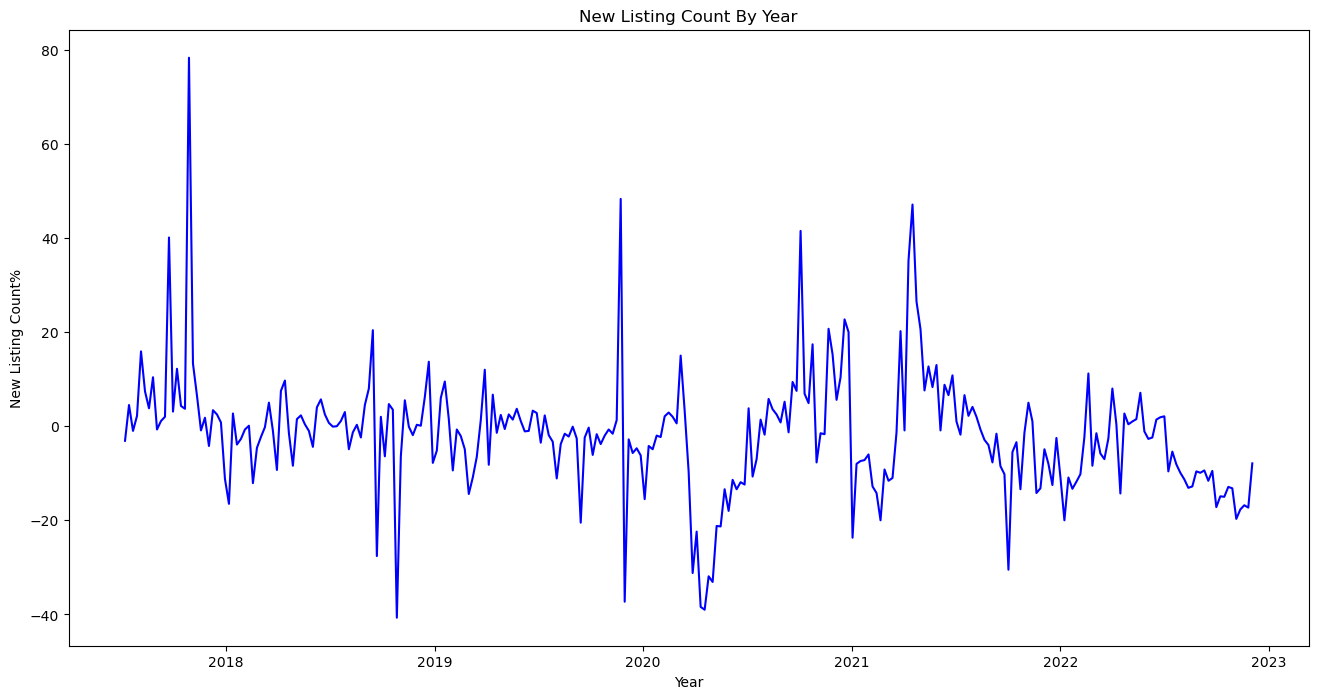

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(table['Weekend Date'], table['New Listing Count%'], color='blue')
plt.title('New Listing Count By Year')
plt.xlabel('Year')
plt.ylabel('New Listing Count%')

The new listing count represents a typical week's worth of new listings in a given month. The new listing count can be multiplied by the number of weeks in a month to produce a monthly new listing count. We had the highest New listing count per houses just before the year 2018 but it eventually dropped down below the zero region in 2018. Intuitively, from the visualization above, you can see that the New Listing Count failed to maintain consistency as it was constantly rising and falling throughout the years


...

#### 2.4.2 Visualize Median Listing Price With Year

Text(0, 0.5, 'Median Listing Price%')

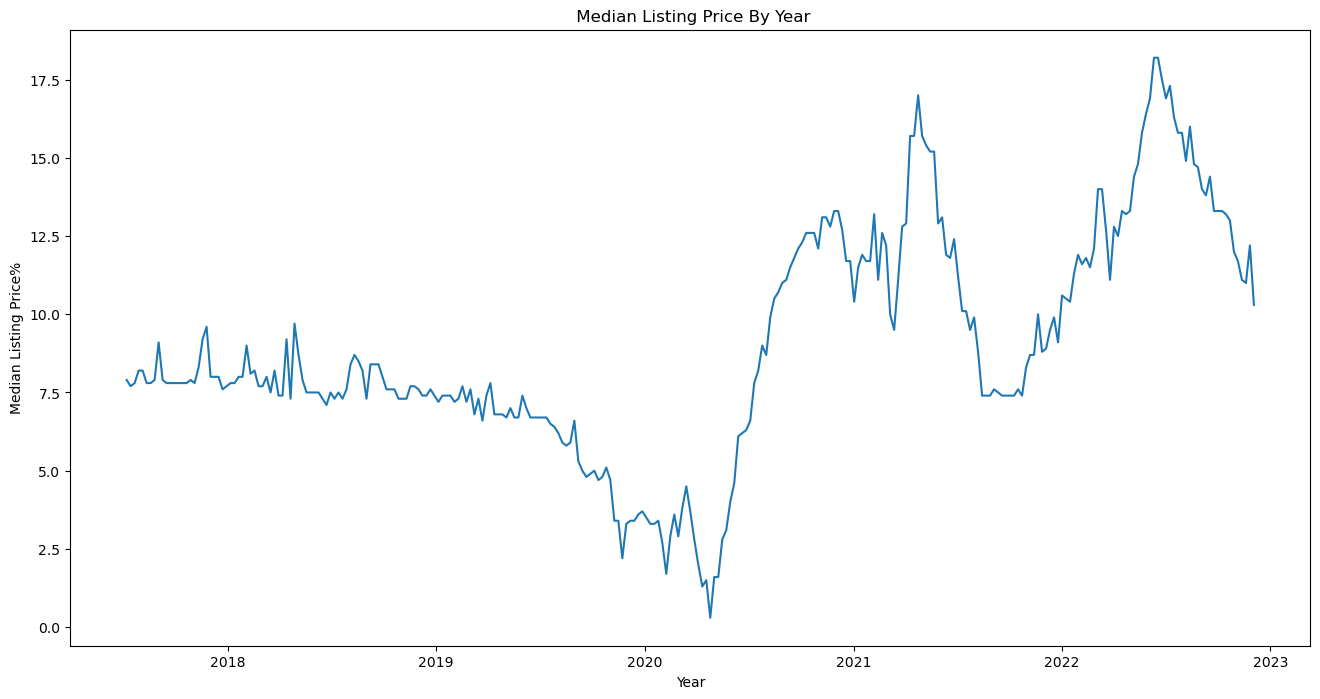

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(table['Weekend Date'], table['Median Listing Price%'],label='Median Listing Price history')
plt.title(' Median Listing Price By Year')
plt.xlabel('Year')
plt.ylabel('Median Listing Price%')

Text(0.5, 1.0, 'Volatility of the Median Listing price')

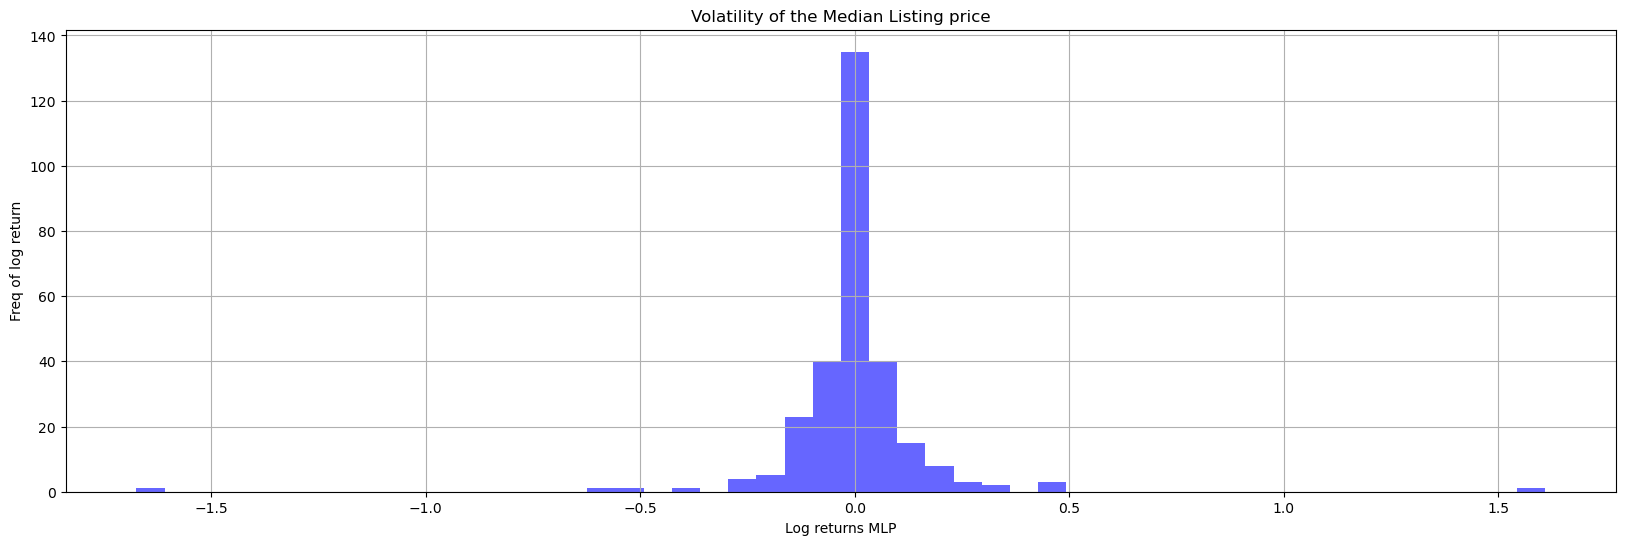

In [ ]:
fig, ax = plt.subplots()
table['Log returns MLP'].hist(figsize=(20,6), ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log returns MLP")
ax.set_ylabel("Freq of log return")
ax.set_title("Volatility of the Median Listing price")

Volatility is measured by historical fluctuations of the asset's price over time. A commercial property that has experienced erratic price swings over a short period is considered highly volatile to investors.From the plot above, you can see the fluctuations through out the years. This indicates that the Median listing price is highly volatile. This is also considered as a red flag as real estate investors will prefer not to invest because volatility shows instability

...

#### 2.4.3 Active Listing Count vs. Median DOM

Text(0, 0.5, 'Percentage')

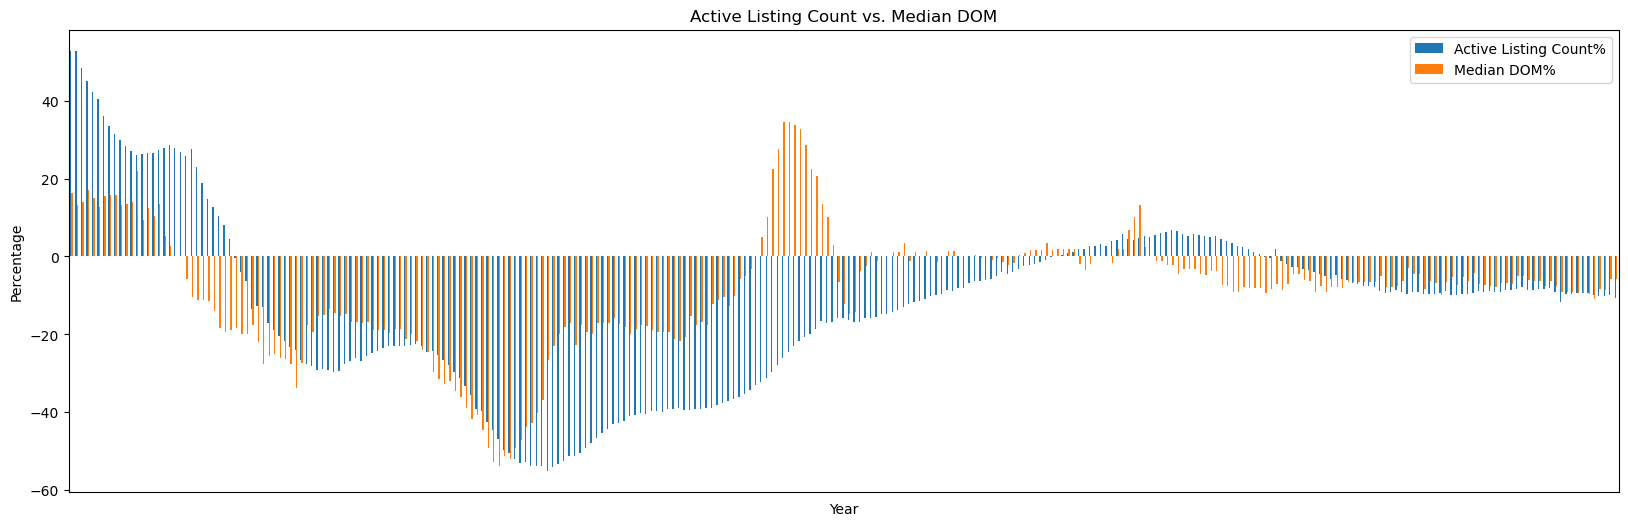

In [ ]:
table[['Active Listing Count%', 'Median DOM%']].loc[0:283].plot.bar(figsize=(20,6))
plt.xticks([])
plt.title('Active Listing Count vs. Median DOM')
plt.xlabel('Year')
plt.ylabel('Percentage')

According to our common intuition when we look at the graphs, it appears that the US housing market has been on a steady decline. The median list price for homes has been steadily decreasing as demand for houses has cooled off slightly in recent weeks. The increase in inventory is now reflected in the fact that homes are taking longer to sell.

## 3 Predicting Median Listing Price Using LSTM Neural Network.
The next stage, after our analysis is complete, is to use Long short-term memory (LSTM) to build and test our Predictions. LSTM, a unique category of recurrent neural network (RNN) that can learn long-term dependencies, was first presented by Hochreiter & Schmidhuber in 1997. Since then, it has been greatly improved and popularized by many in subsequent works. They are currently widely used and perform fantastically on a wide range of issues. LSTM models come in handy, when working with Time-Series or Periodic Data, because they possess the ability to store information for a long time.  By using the "gates", we have total control over what information is preserved and what is disregarded when working with an LSTM model. If you are unfamiliar with LSTM, read the following article to find out more: 
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/

### 3.1 Building the input features
To prevent overfitting and to be able to examine our model, the data must then be split into training and testing sets. The "Median Listing Price" value will serve as the forecasted goal value.

In [ ]:
#Sorting the dataset on date time and filtering “Weekend Date” and “Median Listing Price” columns
table["Weekend Date"]=pandas.to_datetime(table['Weekend Date'],format="%Y-%m-%d")
table.index=table['Weekend Date']

data=table.sort_index(ascending=True,axis=0)
new_dataset=pandas.DataFrame(index=range(0,len(table)),columns=['Date','Median Listing Price'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=table['Weekend Date'][i]
    new_dataset["Median Listing Price"][i]=table['Median Listing Price%'][i]

#Feature Scaling    
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values
train_data=final_dataset[0:283,:]
valid_data=final_dataset[283:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

#Creating a data structure with 60 time-steps and 1 output
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

### 3.2 Building and training the LSTM model

2022-12-13 18:05:58.063267: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
4/4 - 2s - loss: 0.2191 - val_loss: 0.0874 - 2s/epoch - 503ms/step
Epoch 2/50
4/4 - 0s - loss: 0.0659 - val_loss: 0.0140 - 208ms/epoch - 52ms/step
Epoch 3/50
4/4 - 0s - loss: 0.0260 - val_loss: 0.0337 - 182ms/epoch - 46ms/step
Epoch 4/50
4/4 - 0s - loss: 0.0253 - val_loss: 0.0121 - 195ms/epoch - 49ms/step
Epoch 5/50
4/4 - 0s - loss: 0.0122 - val_loss: 0.0176 - 194ms/epoch - 49ms/step
Epoch 6/50
4/4 - 0s - loss: 0.0177 - val_loss: 0.0171 - 178ms/epoch - 45ms/step
Epoch 7/50
4/4 - 0s - loss: 0.0163 - val_loss: 0.0122 - 183ms/epoch - 46ms/step
Epoch 8/50
4/4 - 0s - loss: 0.0122 - val_loss: 0.0110 - 189ms/epoch - 47ms/step
Epoch 9/50
4/4 - 0s - loss: 0.0118 - val_loss: 0.0119 - 177ms/epoch - 44ms/step
Epoch 10/50
4/4 - 0s - loss: 0.0117 - val_loss: 0.0106 - 175ms/epoch - 44ms/step
Epoch 11/50
4/4 - 0s - loss: 0.0103 - val_loss: 0.0103 - 186ms/epoch - 47ms/step
Epoch 12/50
4/4 - 0s - loss: 0.0103 - val_loss: 0.0105 - 194ms/epoch - 49ms/step
Epoch 13/50
4/4 - 0s - loss: 0.0105 - v

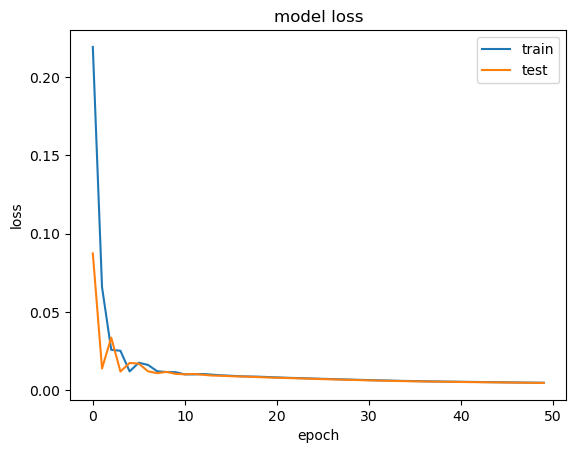

In [ ]:
#Adding the LSTM layer
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=
(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))

#Adding the output layer
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

#Compiling the RNN
lstm_model.compile(loss='mean_squared_error',optimizer='adam')

#Fitting the RNN to the Training set
history = lstm_model.fit(x_train_data,y_train_data,epochs=50,batch_size=72, validation_data=(x_train_data,y_train_data), verbose=2, shuffle=False)

#Plotting history for loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.legend()
pyplot.show()

### 3.3 Making Median Listing Price predictions using a test set

In [ ]:
#Taking a sample of the dataset to make Median Listing Price predictions using the LSTM model
dataset_train = table.iloc[183:, 1:2]
dataset_test = table.iloc[:183, 1:2]
dataset_total = pandas.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)


X_test=[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#print(X_test.shape)
#print(x_train_data.shape)
predicted_median_listing_price= lstm_model.predict(X_test)
predicted_median_listing_price=scaler.inverse_transform(predicted_median_listing_price)

6/6 [==============================] - 0s 9ms/step


### 3.4 Visualizing the result

/var/folders/tl/v2wcr5tn0xj6q18_dy9qxjtc0000gn/T/ipykernel_94817/884909878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_median_listing_price


,Median Listing Price,Predictions
Date,,
2022-12-03,10.3,7.944880
2022-11-26,12.2,8.097157
2022-11-19,11.0,8.489411
2022-11-12,11.1,8.935168
2022-11-05,11.7,9.402624


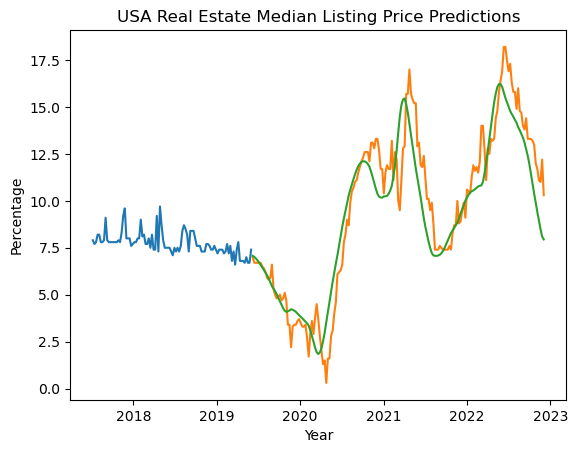

In [ ]:
train_data=new_dataset[183:]
valid_data=new_dataset[:183]
valid_data['Predictions']=predicted_median_listing_price
plt.plot(train_data["Median Listing Price"])
plt.plot(valid_data[['Median Listing Price',"Predictions"]])
plt.title('USA Real Estate Median Listing Price Predictions')
plt.xlabel('Year')
plt.ylabel('Percentage')

df= pandas.DataFrame(valid_data[['Median Listing Price', 'Predictions']])
df.head()

### 3.5 Observation
From the result of our prediction, it is evident that our model produced nearly accurate predictions. It accurately tracks most of the sudden surges and declines; an instance is, the drastic rise in 2020 resulting from the lockdowns during the pandemics.

## 4 Streamlit Approach
streamlit is a a very good notebook which is use to write python code just like Jupyter Notebook or spyder. The main difference between streamlit and other python Notebooks is that, Streamlit provide an environment like a backend where you can write python code to create a web page. Streamlit has majourity of the famous Machine and D eep Learning libraries. A step wise approach was used to create the website, which also shows the title of the project, the name of the students and it also create a pathway for a link to more information.
...

## 5 Conclusion
...

### 5.1 References
- Real Estate Dataset: https://econdata.s3-us-west-2.amazonaws.com/Reports/Core/listing_weekly_core_aggregate_by_country.csv
- Python Cheat Sheet: https://cheatography.com/davechild/cheat-sheets/python/
- Matplotlib: http://datacamp-community-prod.s3.amazonaws.com/e1a8f39d-71ad-4d13-9a6b-618fe1b8c9e9
- Keras: https://oindrilasen.com/2021/02/how-to-install-and-import-keras-in-anaconda-jupyter-notebooks/
- Understanding LSTM Networks: https://colah.github.io/posts/2015-08-Understanding-LSTMs/
- LSTM: https://en.wikipedia.org/wiki/Long_short-term_memory